<a href="https://colab.research.google.com/github/Kyrillos1/Song-Popularity-Prediction/blob/main/diabetes_health_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from math import sqrt

plt.style.use('seaborn-darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error

In [ ]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
print(f"Data has {df.shape[0]} Rows and {df.shape[1]} Features")
print(df.head())

Data has 253680 Rows and 22 Features
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      1

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
print(df.columns)

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
print(df.describe())

       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000      

In [ ]:
print(df.isna().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
print(duplicate['Diabetes_binary'].value_counts(normalize=True)*100)

Duplicate Rows :  24206
0.0    98.971329
1.0     1.028671
Name: Diabetes_binary, dtype: float64


In [ ]:
df = df.drop_duplicates(subset=None, keep="first", inplace=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [ ]:
df = df.astype('int') #convert the data to int type because  Integer arithmetic is faster

In [ ]:
print(df['Diabetes_binary'].value_counts(normalize=True)*100)

0    84.705457
1    15.294543
Name: Diabetes_binary, dtype: float64


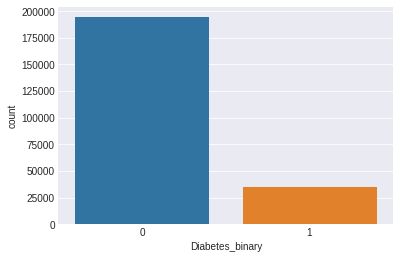

In [ ]:
sns.countplot(x='Diabetes_binary',data=df)

Unbal

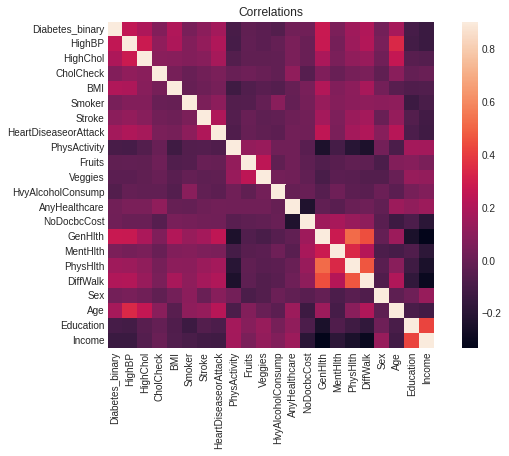

In [ ]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Correlations")
plt.show()

In [ ]:
correlation = df.corr()
updatedData = pd.DataFrame();
cnt = 0;
for i in range (len(correlation['Diabetes_binary'])):
    if abs(correlation['Diabetes_binary'][i]) >= 0.05:
        myColumn = df[df.columns[i] ]
        updatedData.insert(cnt,df.columns[i],myColumn)
        cnt = cnt+1

In [ ]:
X = updatedData.drop(['Diabetes_binary'],axis=1)
y = updatedData['Diabetes_binary']

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(y.value_counts())

0    194377
1    194377
Name: Diabetes_binary, dtype: int64


In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(311003, 15)
(311003,)
(77751, 15)
(77751,)


In [ ]:
# Creating StandardScaler instance
sc = StandardScaler()
# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)
# Scaling data
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1,10,100,1000],'random_state':[0]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]'random_state':[0]}])
              #  ,(SVC(),[{'C': [0.1, 1, 10, 100, 1000],'gamma': [0.25,0.5,0.75,1,10,100],'kernel': ['rbf']}])
                ]

for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

In [ ]:
def main(classifier,cls_name):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)

  #Training Data Set
  print(cls_name+"\n-----------TRAINING DATA-----------")
  AccScore = accuracy_score(y_train, y_train_pred)
  print("Accuracy Score: ",AccScore*100)
  print(classification_report(y_train, y_train_pred)) 

    #check MSE & RMSE 
  mse = mean_squared_error(y_train, y_train_pred)
  print('Mean Squared Error : '+ str(mse))
  rmse = sqrt(mean_squared_error(y_train, y_train_pred))
  print('Root Mean Squared Error : '+ str(rmse))

  CM = confusion_matrix(y_train, y_train_pred)
  print('Confusion Matrix is : \n', CM)
  # drawing confusion matrix
  plt.figure(figsize = (8,6))
  sns.heatmap(CM, center = True, fmt = ".0f", cmap = 'viridis')
  plt.show()


  print("\n-----------TESTING DATA-----------")
  #Testing Data Set
  AccScore = accuracy_score(y_test, y_test_pred)
  print("Accuracy Score: ",AccScore*100)
  print(classification_report(y_test, y_test_pred)) 

  #check MSE & RMSE 
  mse = mean_squared_error(y_test, y_test_pred)
  print('Mean Squared Error : '+ str(mse))
  rmse = sqrt(mean_squared_error(y_test, y_test_pred))
  print('Root Mean Squared Error : '+ str(rmse))


  CM = confusion_matrix(y_test, y_test_pred)
  print('Confusion Matrix is : \n', CM)
  # drawing confusion matrix
  plt.figure(figsize = (8,6))
  sns.heatmap(CM, center = True, fmt = ".0f", cmap = 'viridis')
  plt.show()


Logistic Regression Model
-----------TRAINING DATA-----------
Accuracy Score:  71.76425950875071
              precision    recall  f1-score   support

           0       0.73      0.69      0.71    155447
           1       0.71      0.74      0.72    155556

    accuracy                           0.72    311003
   macro avg       0.72      0.72      0.72    311003
weighted avg       0.72      0.72      0.72    311003

Mean Squared Error : 0.2823574049124928
Root Mean Squared Error : 0.531373131530465
Confusion Matrix is : 
 [[107984  47463]
 [ 40351 115205]]


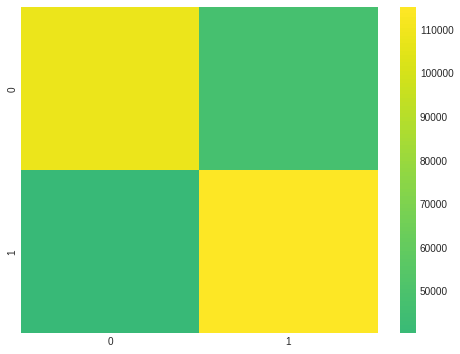


-----------TESTING DATA-----------
Accuracy Score:  71.8704582577716
              precision    recall  f1-score   support

           0       0.73      0.70      0.71     38930
           1       0.71      0.74      0.72     38821

    accuracy                           0.72     77751
   macro avg       0.72      0.72      0.72     77751
weighted avg       0.72      0.72      0.72     77751

Mean Squared Error : 0.281295417422284
Root Mean Squared Error : 0.5303729041177386
Confusion Matrix is : 
 [[27109 11821]
 [10050 28771]]


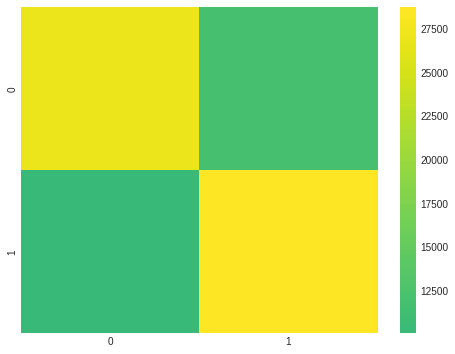

In [ ]:
#Fitting Logistic Regression Model
logistic_regression_classifier = LogisticRegression(C= 0.5, random_state= 0)
logistic_regression_classifier.fit(X_train, y_train)
main(logistic_regression_classifier,'Logistic Regression Model')

Decision Tree Model
-----------TRAINING DATA-----------
Accuracy Score:  96.34826673697681
              precision    recall  f1-score   support

           0       0.97      0.96      0.96    155447
           1       0.96      0.97      0.96    155556

    accuracy                           0.96    311003
   macro avg       0.96      0.96      0.96    311003
weighted avg       0.96      0.96      0.96    311003

Mean Squared Error : 0.03651733263023186
Root Mean Squared Error : 0.19109508792805707
Confusion Matrix is : 
 [[148605   6842]
 [  4515 151041]]


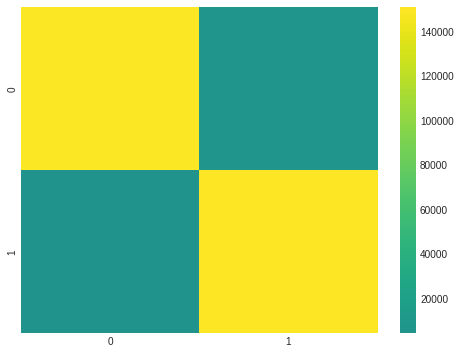


-----------TESTING DATA-----------
Accuracy Score:  80.72564983087034
              precision    recall  f1-score   support

           0       0.84      0.76      0.80     38930
           1       0.78      0.86      0.82     38821

    accuracy                           0.81     77751
   macro avg       0.81      0.81      0.81     77751
weighted avg       0.81      0.81      0.81     77751

Mean Squared Error : 0.1927435016912966
Root Mean Squared Error : 0.43902562760196195
Confusion Matrix is : 
 [[29537  9393]
 [ 5593 33228]]


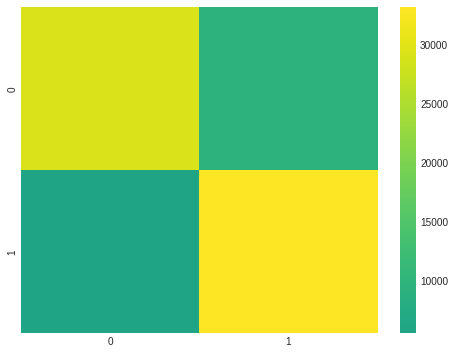


-----------------------------------------------



,Feature,Importance (%)
0,BMI,17.84
1,Age,14.03
2,GenHlth,11.58
3,Income,11.36
4,PhysHlth,10.99
5,MentHlth,8.48
6,Education,7.64
7,HighBP,4.52
8,HighChol,3.49
9,PhysActivity,2.25


In [ ]:
decision_tree_classifier = DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
decision_tree_classifier = decision_tree_classifier.fit(X_train,y_train)
main(decision_tree_classifier,'Decision Tree Model')
print('\n-----------------------------------------------\n')

fun=lambda row: np.round((row * 100),2)
features = fun(decision_tree_classifier.feature_importances_)
def Sort_Tuple(tup):
    return(sorted(tup, key = lambda x: x[1],reverse=True)) 
pd.DataFrame(Sort_Tuple(list(zip(X.columns,features))),columns=['Feature', 'Importance (%)'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVC Model
-----------TRAINING DATA-----------
Accuracy Score:  71.86361546351642
              precision    recall  f1-score   support

           0       0.74      0.67      0.71    155447
           1       0.70      0.76      0.73    155556

    accuracy                           0.72    311003
   macro avg       0.72      0.72      0.72    311003
weighted avg       0.72      0.72      0.72    311003

Mean Squared Error : 0.2813638453648357
Root Mean Squared Error : 0.5304374094696147
Confusion Matrix is : 
 [[104687  50760]
 [ 36745 118811]]


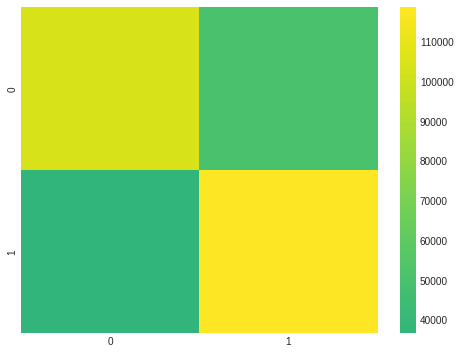


-----------TESTING DATA-----------
Accuracy Score:  71.974636982161
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     38930
           1       0.70      0.76      0.73     38821

    accuracy                           0.72     77751
   macro avg       0.72      0.72      0.72     77751
weighted avg       0.72      0.72      0.72     77751

Mean Squared Error : 0.28025363017839
Root Mean Squared Error : 0.5293898659573962
Confusion Matrix is : 
 [[26291 12639]
 [ 9151 29670]]


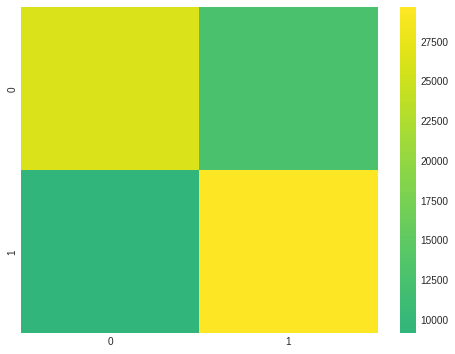

In [ ]:
from sklearn.svm import LinearSVC
svc_classifier =LinearSVC( C=1,loss="hinge",random_state= 0)
svc_classifier.fit(X_train, y_train)
main(svc_classifier,'SVC Model')

### Decision Tree Classifier model performs best fit for our dataset.
with a accuracy Score = 80.89 and mean squared error = 0.19


In [ ]:
import joblib
joblib.dump(decision_tree_classifier, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
# df = pd.read_csv('.csv')
# df = df.astype('int') #convert the data to int type because  Integer arithmetic is faster

# X = df.drop(['Diabetes_binary'],axis=1)
# y = df['Diabetes_binary']
# sc = StandardScaler()
# data = sc.fit_transform(X)
# X = sc.transform()

In [ ]:
# y_pred=my_model_loaded.predict(X)

# AccScore = accuracy_score(y, y_pred)
# print("Accuracy Score: ",AccScore*100)
# print(classification_report(y, y_pred)) 

# #check MSE & RMSE 
# mse = mean_squared_error(y, y_pred)
# print('Mean Squared Error : '+ str(mse))
# rmse = sqrt(mean_squared_error(y, y_pred))
# print('Root Mean Squared Error : '+ str(rmse))


# CM = confusion_matrix(y, y_pred)
# print('Confusion Matrix is : \n', CM)
# # drawing confusion matrix
# plt.figure(figsize = (8,6))
# sns.heatmap(CM, center = True, fmt = ".0f", cmap = 'viridis')
# plt.show()